In [8]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/ImagesCVtest_sorted'

# Define the path to the CSV file containing the labels
New_csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(New_csv_path)

# Initialize empty lists to hold the image data and labels
X = []
y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray,
                       orientations=8,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        # Add the features and label to the X and y lists
        X.append(features)
        y.append(label)

# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid to search over
param_grid = {'svc__C': [0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'svc__degree': [2, 3, 4],
                'svc__gamma': [0.1, 1, 10, 100]
              }

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Use the best hyperparameters to train the SVM model on the entire dataset
best_params = grid_search.best_params_
svm_model = SVC(C=best_params['svc__C'], kernel=best_params['svc__kernel'], degree=best_params['svc__degree'], gamma=best_params['svc__gamma'])
svm_model.fit(X_train, y_train)

# Evaluate the SVM model on the testing set and print the accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
joblib.dump(svm_model, 'svm_model8.pkl')
#Make the model more accurate

Best hyperparameters:  {'svc__C': 10, 'svc__degree': 2}
Best accuracy:  0.6997741707833451
Accuracy:  0.7521994134897361


['svm_model12.pkl']

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.55      0.55      0.55        11
           2       0.89      0.80      0.84        10
           3       0.76      0.65      0.70        20
           4       0.59      0.93      0.72        14
           5       0.87      0.81      0.84        16
           6       0.60      0.67      0.63         9
           7       0.80      0.80      0.80        15
           8       0.83      0.83      0.83        12
           9       0.69      0.82      0.75        11
           A       1.00      0.94      0.97        16
           B       0.86      0.67      0.75         9
           C       0.50      0.44      0.47         9
           D       0.91      1.00      0.95        10
           E       0.93      0.93      0.93        15
           F       0.92      0.79      0.85        14
           G       1.00      0.90      0.95        10
           H       1.00    

``python``


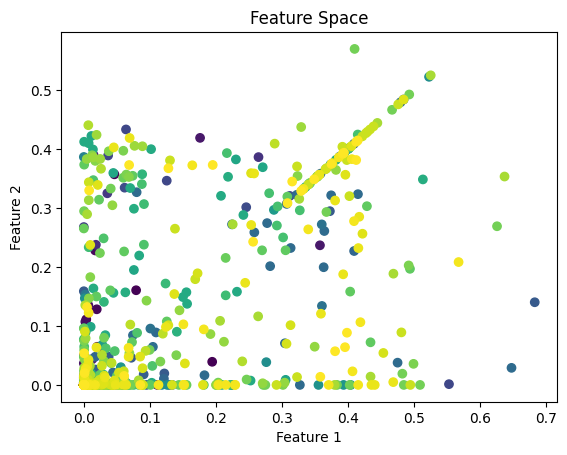

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_encoded)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature Space')
plt.show()

This plot shows the feature space of the dataset. The two features are the HOG features extracted from the images. The color of each point represents the class of the image. The classes are encoded as follows: 0 to 25 for each capital letter and 26 to 51 for each lowercase letter. The plot shows that the dataset is not linearly separable, so we will need to use a non-linear kernel for the SVM model. We will use the RBF kernel, which is the default kernel for the SVC class in scikit-learn. We will also use the default value for the gamma parameter, which is 1 / (n_features * X.var()), where n_features is the number of features in the dataset and X.var() is the variance of the features. We will also use the default value for the C parameter, which is 1.0. We will perform hyperparameter tuning to find the best values for these parameters.


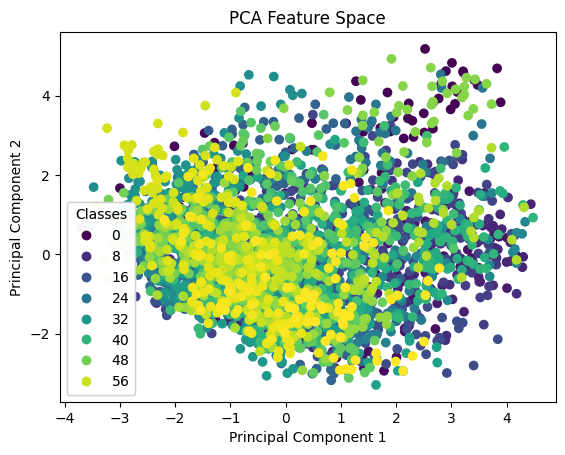

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to reduce the dimensionality of the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points with their corresponding labels
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Feature Space')

# Add a legend
legend = ax.legend(*scatter.legend_elements(),
                   loc="lower left", title="Classes")
ax.add_artist(legend)

plt.show()

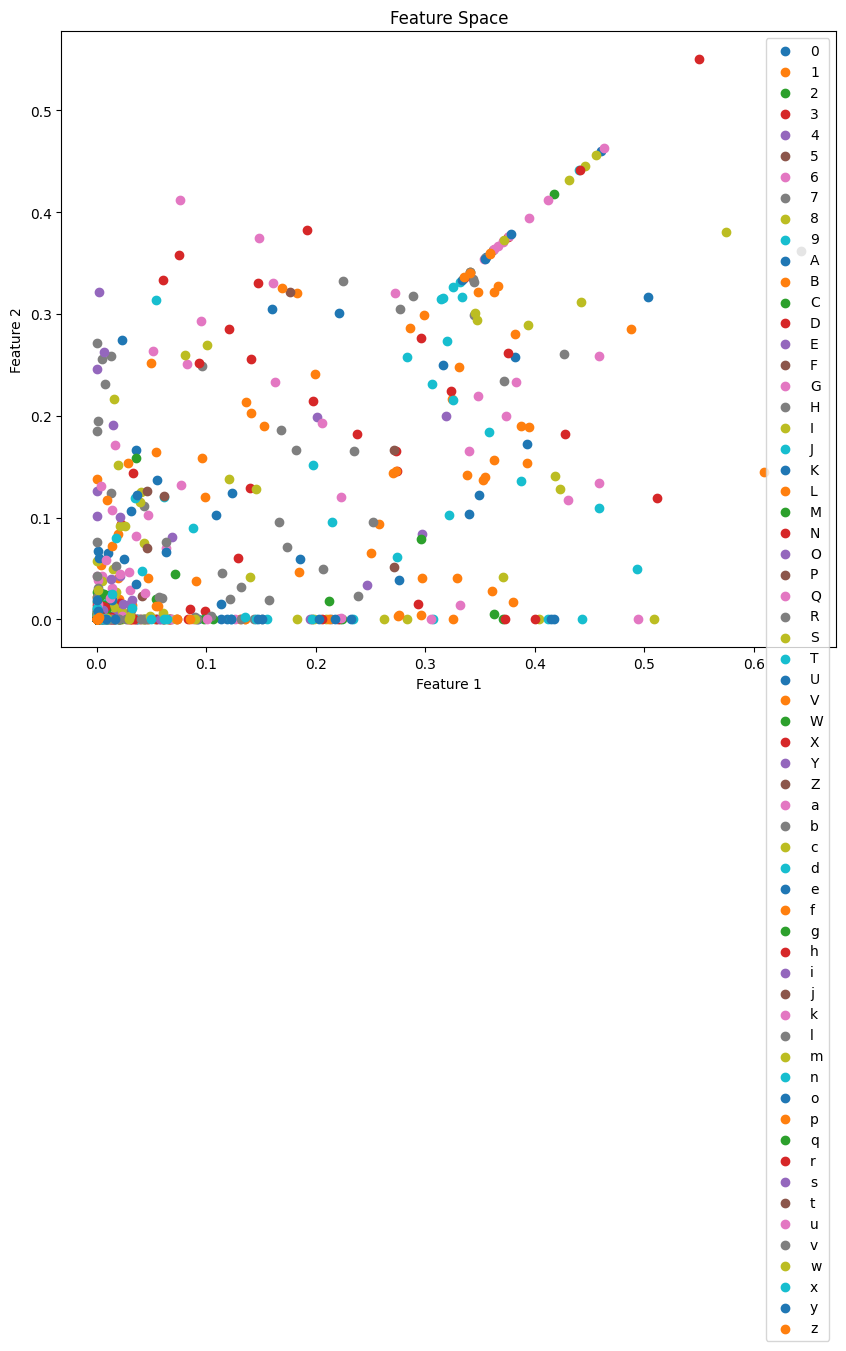

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(le.classes_)):
    mask = (y_encoded == i)
    ax.scatter(X[:, 0][mask], X[:, 1][mask], label=le.inverse_transform([i])[0])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature Space')
ax.legend()
plt.show()


In [3]:
import joblib
joblib.dump(svm_model, 'svm_model6.pkl')

['svm_model5.pkl']

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Plot the heatmap using seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2728, 682]

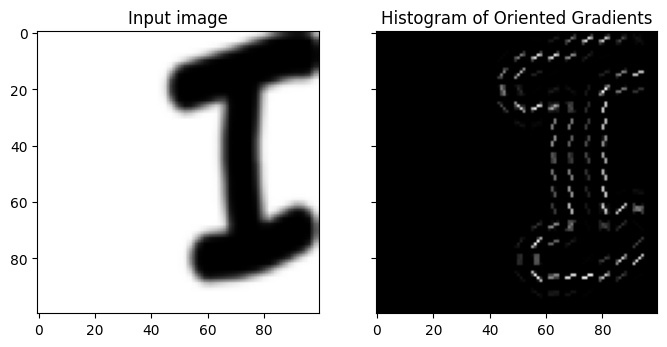

In [26]:
from skimage.exposure import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.io import imread

# Load an example image and convert it to grayscale
image_path = '/Users/metoditarnev/Desktop/letters/imagesTest_sorted/'
# Get the 300th image from the dataset
image_path = os.path.join(image_path, df.iloc[1000]['image'])
image = imread(image_path)
gray = rgb2gray(image)

# Define the HOG parameters
orientations=8
pixels_per_cell=(6, 6)
cells_per_block=(2, 2)
block_norm='L2-Hys'

# Extract the HOG features
hog_features, hog_image = hog(gray, orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              block_norm=block_norm,
                              visualize=True)

# Plot the original image and the HOG image side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale pixel values to fit in the range 0-1
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [15]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('/Users/metoditarnev/Downloads/train-images-idx3-ubyte')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 6: invalid continuation byte

In [3]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/imagesTest_sorted'

# Define the path to the CSV file containing the labels
New_csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(New_csv_path)

# Initialize empty lists to hold the image data and labels
X = []
y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray,
                       orientations=12,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        # Add the features and label to the X and y lists
        X.append(features)
        y.append(label)

# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid to search over
param_grid = {'svc__C': [0.1, 1, 10],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'svc__degree': [2, 3, 4]
              }

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Use the best hyperparameters to train the SVM model on the entire dataset
best_params = grid_search.best_params_
svm_model = SVC(C=best_params['svc__C'], kernel=best_params['svc__kernel'], degree=best_params['svc__degree'], gamma='auto')
svm_model.fit(X_train_val, y_train_val)

# Evaluate the SVM model on the testing set and print the accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


KeyboardInterrupt



In [18]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization


# Define the path to the folder containing the images
folder_path = '/Users/metoditarnev/Desktop/letters/imagesTest_sorted'

# Define the path to the CSV file containing the labels
New_csv_path = '/Users/metoditarnev/Desktop/letters/english.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(New_csv_path)

# Initialize empty lists to hold the image data and labels
X = []
y = []

# Iterate over the rows of the DataFrame and load each image and its label
for index, row in df.iterrows():
    file_name = row['image']
    label = row['label']
    if file_name.endswith('.png'):
        # Load the image and convert it to grayscale
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)
        gray = rgb2gray(image)

        # Extract HOG features from the image
        features = hog(gray,
                       orientations=8,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        # Add the features and label to the X and y lists
        X.append(features)
        y.append(label)

# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Define the SVM model as a function of the hyperparameters to optimize
def svm_model(C, kernel, degree):
    clf = SVC(C=C, kernel=kernel, degree=int(degree), gamma='scale')
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])
    cv = KFold(n_splits=5)
    scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1)
    return np.mean(scores)

# Define the bounds for the hyperparameters to optimize
pbounds = {
    'C': (0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': (2, 4),
}

# Create the BayesianOptimization object and optimize the hyperparameters
optimizer = BayesianOptimization(f=svm_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters: ", optimizer.max['params'])
print("Best accuracy: ", optimizer.max['target'])

# Use the best hyperparameters to train the SVM model on the entire dataset
best_params = optimizer.max['params']
svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=int(best_params['degree']), gamma='scale')
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm_model)
])
pipeline.fit(X, y)

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model8.pkl')

|   iter    |  target   |     C     |  degree   |
-------------------------------------------------
| 1         | 0.02111   | 3.808     | 3.901     |
| 2         | 0.02111   | 7.347     | 3.197     |
| 3         | 0.01877   | 1.645     | 2.312     |
| 4         | 0.004692  | 0.675     | 3.732     |
| 5         | 0.02111   | 6.051     | 3.416     |
| 6         | 0.02111   | 4.714     | 2.897     |
| 7         | 0.02111   | 9.682     | 4.0       |
| 8         | 0.02111   | 9.403     | 2.0       |
| 9         | 0.02111   | 3.29      | 2.0       |
| 10        | 0.02111   | 6.47      | 2.0       |
| 11        | 0.02111   | 8.023     | 2.0       |
| 12        | 0.02111   | 8.317     | 4.0       |
| 13        | 0.02111   | 5.008     | 4.0       |
| 14        | 0.02111   | 10.0      | 2.899     |
| 15        | 0.02111   | 8.834     | 3.004     |
| 16        | 0.02111   | 5.055     | 2.0       |
| 17        | 0.02111   | 6.838     | 4.0       |
| 18        | 0.02023   | 2.429     | 2.0       |


['svm_model13.pkl']